In [158]:
import os

import numpy as np
import pandas as pd
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [161]:
%load_ext autoreload
%autoreload 2
from measure import mutual

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
series_path = '../local_data/numpy_series/'

In [163]:
files = np.sort(os.listdir(series_path))
print(f'Files: {len(files)}')
files[0]

Files: 57


'0002.npy'

In [164]:
paths = [series_path + file for file in files]

In [165]:
parts = 2

testSeries = []
reTestSeries = []

subject_id = []
for file in paths:
    name = file.split('/')[-1][:4]
    subject_id.append(name)
    data = np.load(file)
    idx = data.shape[1] // parts
    test, retest = data[:,:idx], data[:,idx:]
    testSeries.append(test)
    reTestSeries.append(retest)
print(f'testSeries: {len(testSeries)} --', f'reTestSeries: {len(reTestSeries)}')

testSeries: 57 -- reTestSeries: 57


In [166]:
testSeries[1].shape

(232, 301)

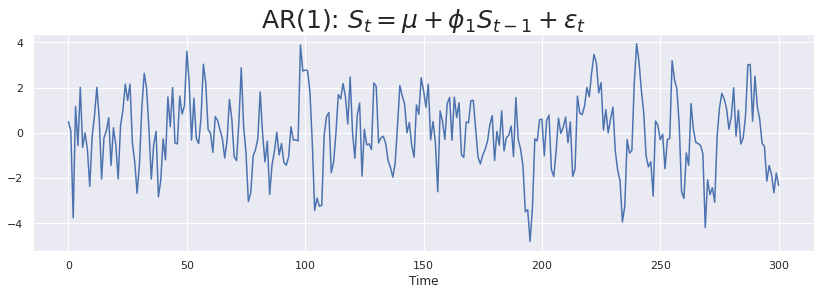

In [170]:
plt.figure(figsize=(14,4))
plt.title('AR(1): '+'$S_t = \mu + \phi_1 S_{t-1} + \epsilon_t$', fontsize=25)
plt.plot(testSeries[1][0])
plt.xlabel('Time')
plt.show()

### Correlation

In [189]:
testFCs = []
reTestFCs = []
for i,j  in zip(testSeries, reTestSeries):
    corr_i = np.corrcoef(i)
    corr_j = np.corrcoef(j)
    testFCs.append(corr_i)
    reTestFCs.append(corr_j)
print('test FCs: ', len(testFCs), testFCs[0].shape)
print('reTest FCS: ', len(reTestFCs), reTestFCs[0].shape)

test FCs:  57 (232, 232)
reTest FCS:  57 (232, 232)


### Mutual Information

In [190]:
testSeries[0].shape

(232, 223)

In [191]:
testSeries[:1][0].shape

(232, 223)

In [192]:
testSeries[:1][0][0].shape

(223,)

In [193]:
testFCsMI = []
reTestFCsMI = []
size = 232
for i,j  in zip(testSeries, reTestSeries):
    s = range(size)
    pairs = product(s,s)
    mxi = np.zeros((size, size))
    mxj = np.zeros([size, size])
    for p in pairs:
        #print(p)
        #print(p[0],p[1])
        #print(i[p[0]].shape, i[p[1]].shape)
        mi_i = mutual(i[p[0]],i[p[1]], 10)
        mi_j = mutual(j[p[0]],j[p[1]], 10)
        mxi[p[0]][p[1]] = mi_i
        mxj[p[0]][p[1]] = mi_j
    testFCsMI.append(mxi)
    reTestFCsMI.append(mxj)
print('test FCs: ', len(testFCsMI), testFCsMI[0].shape)
print('reTest FCS: ', len(reTestFCsMI), reTestFCsMI[0].shape)

test FCs:  57 (232, 232)
reTest FCS:  57 (232, 232)


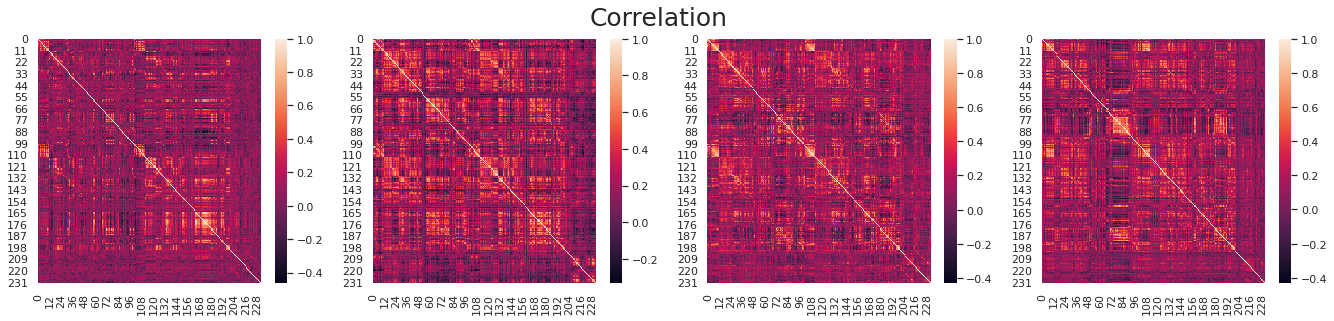

In [194]:
fig = plt.figure(figsize=(23,4.5))

for i in range(1,len(testFCs[:4])+1):
    #print(i)
    axes = fig.add_subplot(1, 4, i)
    sns.heatmap(testFCs[i-1])
plt.suptitle('Correlation', fontsize=25)
plt.show()

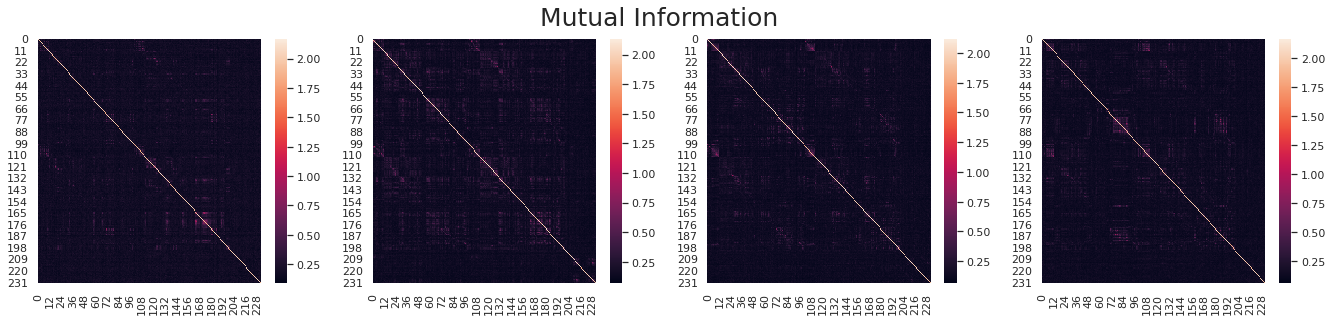

In [195]:
fig = plt.figure(figsize=(23,4.5))

for i in range(1,len(testFCsMI[:4])+1):
    #print(i)
    axes = fig.add_subplot(1, 4, i)
    sns.heatmap(testFCsMI[i-1])
plt.suptitle('Mutual Information', fontsize=25)
plt.show()

In [196]:
for s in [0,1,2,3,4,5]:
    print(testSeries[s].shape)
    x = testSeries[s][0]
    y = testSeries[s][1]
    print(np.corrcoef(x,y), testFCs[s][0,1] )
    print(mutual(x,y, 10), testFCsMI[s][0,1])
    print('')

(232, 223)
[[1.         0.23380749]
 [0.23380749 1.        ]] 0.23380749172907217
0.17820922449695328 0.17820922449695328

(232, 301)
[[1.         0.36552501]
 [0.36552501 1.        ]] 0.36552500624584433
0.17855705871357244 0.17855705871357244

(232, 303)
[[1.         0.67776106]
 [0.67776106 1.        ]] 0.6777610647608311
0.3694546267181781 0.3694546267181781

(232, 305)
[[1.        0.0561479]
 [0.0561479 1.       ]] 0.05614789785046353
0.13108770549473503 0.13108770549473503

(232, 305)
[[1.         0.19025651]
 [0.19025651 1.        ]] 0.19025651303155083
0.14550675312074932 0.14550675312074932

(232, 304)
[[1.         0.31133581]
 [0.31133581 1.        ]] 0.3113358068646655
0.17469782934719852 0.17469782934719852



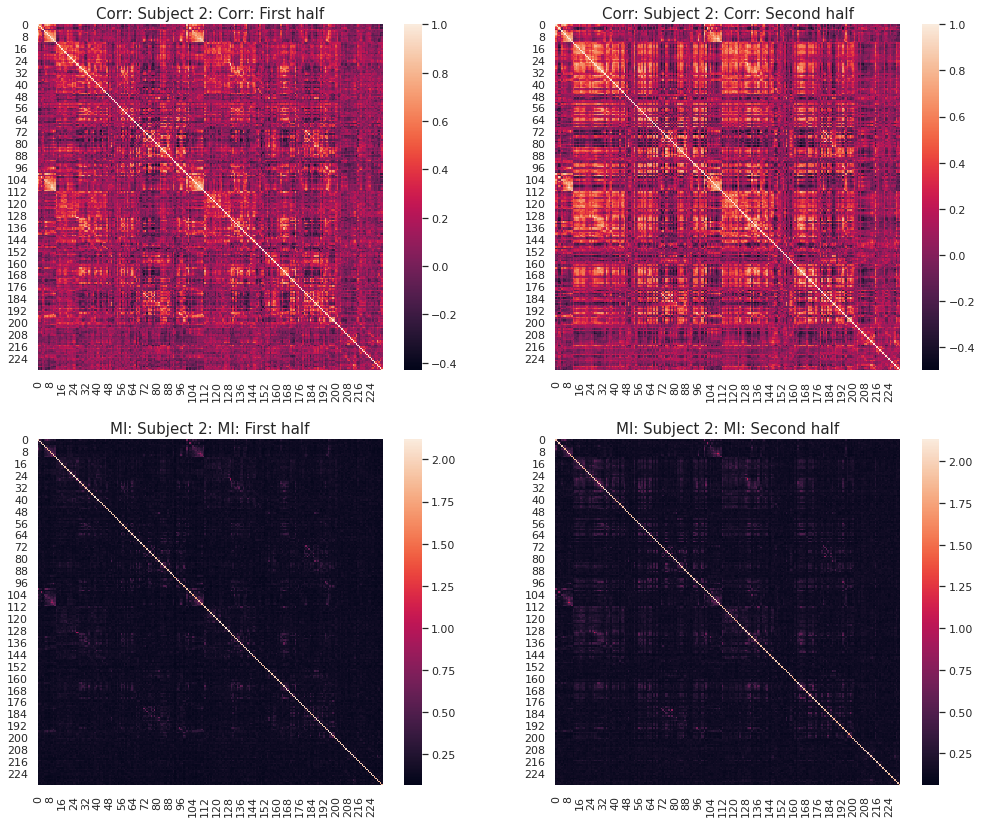

In [198]:
subject = 2

fig, axes = plt.subplots(2, 2, figsize=(17, 14))

ax = axes[0][0]
ax.set_title(f'Corr: Subject {subject}: Corr: First half', fontsize=15)
sns.heatmap(testFCs[subject], ax=ax)

ax = axes[0][1]
ax.set_title(f'Corr: Subject {subject}: Corr: Second half', fontsize=15)
sns.heatmap(reTestFCs[subject], ax=ax)

ax = axes[1][0]
ax.set_title(f'MI: Subject {subject}: MI: First half', fontsize=15)
sns.heatmap(testFCsMI[subject], ax=ax)

ax = axes[1][1]
ax.set_title(f'MI: Subject {subject}: MI: Second half', fontsize=15)
sns.heatmap(reTestFCsMI[subject], ax=ax)

plt.show()

In [199]:
testFCs = np.array(testFCs)
testFCs.shape
np.save('../local_data/testFC_corr', reTestFCs)

In [200]:
reTestFCs = np.array(reTestFCs)
reTestFCs.shape
np.save('../local_data/reTestFC_corr', reTestFCs)

In [201]:
testFCsMI = np.array(testFCsMI)
testFCsMI.shape
np.save('../local_data/testFC_mi', testFCsMI)

In [202]:
reTestFCsMI = np.array(reTestFCsMI)
reTestFCsMI.shape
np.save('../local_data/reTestFC_mi', reTestFCsMI)

In [203]:
def upper_vectorization(A:np.array):
    triangle = np.triu(A, 1)
    vector = triangle[np.triu_indices(triangle.shape[0],1)]

    return vector

In [204]:
testVecs = []
reTestVecs = []
for i, j in zip(testFCs, reTestFCs):
    i_vec = upper_vectorization(i)
    j_vec = upper_vectorization(j)
    testVecs.append(i_vec)
    reTestVecs.append(j_vec)
    
testVecs = np.array(testVecs)
reTestVecs = np.array(reTestVecs)
print(f'Test vecs: {testVecs.shape}')
print(f'ReTest vecs: {testVecs.shape}')

Test vecs: (57, 26796)
ReTest vecs: (57, 26796)


In [205]:
testVecsMI = []
reTestVecsMI = []
for i, j in zip(testFCsMI, reTestFCsMI):
    i_vec = upper_vectorization(i)
    j_vec = upper_vectorization(j)
    testVecsMI.append(i_vec)
    reTestVecsMI.append(j_vec)
    
testVecsMI = np.array(testVecsMI)
reTestVecsMI = np.array(reTestVecsMI)
print(f'Test vecs: {testVecsMI.shape}')
print(f'ReTest vecs: {testVecsMI.shape}')

Test vecs: (57, 26796)
ReTest vecs: (57, 26796)


In [206]:
subjects = []
for i in testVecs:
    friends = []
    for j in reTestVecs:
        corr = np.corrcoef(i,j)[0][1]
        #print(corr)
        friends.append(corr)
    subjects.append(friends)
friendsMatrix = np.array(subjects)
print(friendsMatrix.shape)

(57, 57)


In [207]:
subjects = []
for i in testVecsMI:
    friends = []
    for j in reTestVecsMI:
        corr = np.corrcoef(i,j)[0][1]
        #print(corr)
        friends.append(corr)
    subjects.append(friends)
friendsMatrixMI = np.array(subjects)
print(friendsMatrixMI.shape)

(57, 57)


In [208]:
subjects = []
for i in testVecsMI:
    friends = []
    for j in reTestVecsMI:
        mut = mutual(i,j, 30)
        #print(corr)
        friends.append(mut)
    subjects.append(friends)
friendsMatrixMI2 = np.array(subjects)
print(friendsMatrixMI2.shape)

(57, 57)


In [210]:
panda = pd.DataFrame(friendsMatrix, index=subject_id)
panda.columns =  subject_id

pandaMI = pd.DataFrame(friendsMatrixMI, index=subject_id)
pandaMI.columns =  subject_id

pandaMI2 = pd.DataFrame(friendsMatrixMI2, index=subject_id)
pandaMI2.columns =  subject_id

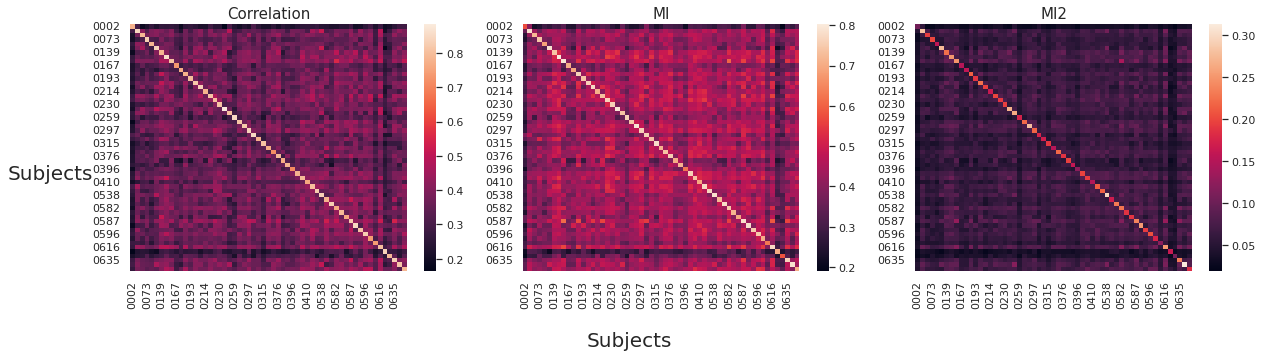

In [219]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax = axes[0]
ax.set_title(f'Correlation', fontsize=15)
sns.heatmap(panda, ax=ax)

ax = axes[1]
ax.set_title(f'MI', fontsize=15)
sns.heatmap(pandaMI, ax=ax)

ax = axes[2]
ax.set_title(f'MI2', fontsize=15)
sns.heatmap(pandaMI2, ax=ax)

fig.supxlabel('Subjects', fontsize=20)
fig.supylabel('Subjects', fontsize=20, rotation=360)
plt.tight_layout()
plt.show()